In [1]:
import math
import pylab
import itertools
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import gilp.examples as examples
import matplotlib.patches as patches
from gilp.simplex import LP, simplex
from gilp.visualize import simplex_visual

In [2]:
def is_invertible(a):
    return a.shape[0] == a.shape[1] and np.linalg.matrix_rank(a) == a.shape[0]


def nCm(n, m):
    return math.factorial(n) // math.factorial(m) // math.factorial(n - m)

In [3]:
def plot(A, b, c, BFS, BIS):
    FS = np.vstack([BFS, BIS])
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))

    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')

    x1bfs, x2bfs = BFS[:, 0], BFS[:, 1]
    x1bis, x2bis = BIS[:, 0], BIS[:, 1]

    slope = -A[:, 0] / A[:, 1]
    intercept = b.flatten() / A[:, 1]
    xaxis = np.arange(min(FS[:, 0]) - 1, max(FS[:, 0]) + 1, .1)
    for _, (m, i) in enumerate(zip(slope, intercept), 1):
        ax.plot(xaxis, m * xaxis + i, label='constraint %d' % _)

    ax.plot(x1bfs, x2bfs, 'ko', markersize=7, label='Basic Feasible Solution')
    ax.plot(x1bis,
            x2bis,
            'rs',
            markersize=7,
            label='Basic Infeasible Solution')

    pp = list(zip(x1bfs, x2bfs))
    cent = (sum([p[0] for p in pp]) / len(pp), sum([p[1]
                                                    for p in pp]) / len(pp))
    # sort by polar angle
    pp.sort(key=lambda p: math.atan2(p[1] - cent[1], p[0] - cent[0]))
    # plot points
    ax.scatter([p[0] for p in pp], [p[1] for p in pp])
    # plot polyline
    ax.add_patch(patches.Polygon(
        pp,
        fill=True,
        hatch='//',
    ))
    pylab.grid()

    ax.set_ylim(min(FS[:, 1]) - 1, max(FS[:, 1]) + 1)

    ax.legend()

# Problem:

$\begin{aligned}
\max &\;\; +3x_1&+2x_2&\\
s.t. &\;\; +1x_1&+2x_2 &\le6\\
 &\;\; +2x_1&+1x_2 &\le8\\
 &\;\; -1x_1&+1x_2 &\le1\\
 &\;\; +0x_1&+1x_2 &\le 2\\
 &\;\; &x_1, x_2 &\ge 0
\end{aligned}$

There are 14 basic solutions. 6 of them are feasible:

optimal x = [3.33 1.33 0.   0.   3.   0.67]
optimal objective = 12.67


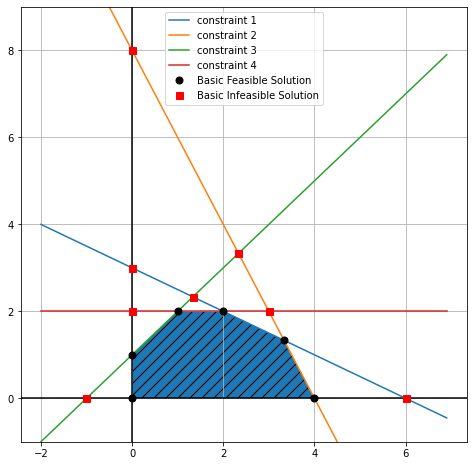

In [4]:
A = np.array([
    [1, 2],
    [2, 1],
    [-1, 1],
    [0, 1],
])
b = np.array([[6], [8], [1], [2]])
c = np.array([[3], [2]])

lp = LP(A, b, c)

FULL_BFS = lp.get_basic_feasible_solns()
FULL_BIS = lp.get_basic_infeasible_solns()

BFS = np.array(list(map(lambda bfs: bfs.x.flatten(), FULL_BFS)))
BIS = np.array(list(map(lambda bis: bis.x.flatten(), FULL_BIS)))
x, B, objval, optimal, path = simplex(lp)
print('There are %d basic solutions. %d of them are feasible:\n' %
      (len(BFS) + len(BIS), len(BFS)))
print('optimal x =', x.flatten().round(2))
print('optimal objective = %.2f' % objval)
plot(A, b, c, BFS, BIS)

In [5]:
# simplex_visual(lp).show()

In [6]:
import scipy.optimize

opt = scipy.optimize.linprog(c=-c, A_ub=A, b_ub=b)
opt

     con: array([], dtype=float64)
     fun: -12.666666666636754
 message: 'Optimization terminated successfully.'
     nit: 5
   slack: array([9.95203919e-12, 1.99467109e-11, 3.00000000e+00, 6.66666667e-01])
  status: 0
 success: True
       x: array([3.33333333, 1.33333333])

In [7]:
A = np.array([[1, 1, 1, 0], [0, 1, 0, 1]])

b = np.array([6, 3])

m, n = A.shape

total = nCm(n, m)
print("maximum number of BFS is", total)

BASIC_SOLUTIONS = []
for indx in map(list, itertools.combinations(range(n), m)):
    B = A[:, indx]

    if is_invertible(B):
        # xB = np.dot(np.linalg.inv(B), b)
        xB = np.linalg.solve(B, b)
        x = np.zeros(n)
        x[indx] = xB
        BASIC_SOLUTIONS.append((indx, x))

BASIC_FEASIBLE_SOLUTIONS = list(
    filter(lambda t: np.all(t[1] >= 0), BASIC_SOLUTIONS))
print('There are %d basic solutions. %d of them are feasible:\n' %
      (len(BASIC_SOLUTIONS), len(BASIC_FEASIBLE_SOLUTIONS)))

print(*BASIC_FEASIBLE_SOLUTIONS, sep='\n\n')

maximum number of BFS is 6
There are 5 basic solutions. 4 of them are feasible:

([0, 1], array([3., 3., 0., 0.]))

([0, 3], array([6., 0., 0., 3.]))

([1, 2], array([0., 3., 3., 0.]))

([2, 3], array([0., 0., 6., 3.]))
